# Ebene "Vorverarbeitung"

### Stufe "Datenspeicherung"

In [35]:
import pandas as pd

# Einlesen Datensatz "auto_mpg" aus aktuellem Ordner
df = pd.read_csv('data_updated.csv')

### Stufe "Datenaufbereitung"

#### Exploration

In [36]:
# Ausgabe der ersten 5 Zeilen
display(df.head())

# Informationen über Struktur und Datentypen des Datensatzes
print(df.info())

,mpg,cyl,dpl,hp,wght,acc,year,org,name
0,18.0,8,307.0,130,3507,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     397 non-null    float64
 1   cyl     397 non-null    int64  
 2   dpl     397 non-null    float64
 3   hp      397 non-null    object 
 4   wght    397 non-null    int64  
 5   acc     397 non-null    float64
 6   year    397 non-null    int64  
 7   org     397 non-null    int64  
 8   name    397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None


#### Data Cleaning

In [37]:
# Entfernung der nominaler Merkmale für die Regression 
df = df.drop(columns=['name'])

# Umwandlung aller metrischen Merkmale in numerische Datentypen, Inkompatible Einträge werden auf 'missing' (nan) gesetzt.
df = df.apply(pd.to_numeric, errors='coerce')

# Entfernen der Zeilen mit 'missing' Werten 
df = df.dropna()

# Behandlung von Ausreißern: Löschen aller Werte, die außerhalb von Mittelwert +/- 3 Standardabweichung liegen
#for col in df.columns:
#    mean = df[col].mean()
#    std = df[col].std()
#    max_value = mean + 3*std
#    min_value = mean - 3*std
#    df = df.drop(df[(df[col] < min_value) | (df[col] > max_value)].index)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 396
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     385 non-null    float64
 1   cyl     385 non-null    int64  
 2   dpl     385 non-null    float64
 3   hp      385 non-null    float64
 4   wght    385 non-null    int64  
 5   acc     385 non-null    float64
 6   year    385 non-null    int64  
 7   org     385 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.1 KB
None


# Ebene "Modellbildung"

### Stufe "Feature Engineering"

,mpg,cyl,dpl,hp,wght,acc,year,org
mpg,1.000000,-0.774643,-0.807068,-0.787812,-0.833591,0.395288,0.568161,0.562748
cyl,-0.774643,1.000000,0.954300,0.849691,0.899001,-0.486261,-0.325974,-0.564313
dpl,-0.807068,0.954300,1.000000,0.890674,0.939714,-0.517863,-0.343222,-0.617161
hp,-0.787812,0.849691,0.890674,1.000000,0.878481,-0.669937,-0.389594,-0.456519
wght,-0.833591,0.899001,0.939714,0.878481,1.000000,-0.402908,-0.293149,-0.583710
acc,0.395288,-0.486261,-0.517863,-0.669937,-0.402908,1.000000,0.253311,0.197010
year,0.568161,-0.325974,-0.343222,-0.389594,-0.293149,0.253311,1.000000,0.169711
org,0.562748,-0.564313,-0.617161,-0.456519,-0.583710,0.197010,0.169711,1.000000


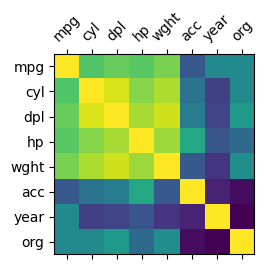

In [38]:
# Bivariate Korrelation der Merkmale untereinander und zu mpg betrachten
display(df.corr())

# Grafische Darstellung der bivariaten Korrelation der Merkmale untereinander und zu mpg
%matplotlib inline
import matplotlib.pyplot as plt
def corr_heatmap(df,size=2.6):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(abs(corr))
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45);
    plt.yticks(range(len(corr.columns)), corr.columns);
corr_heatmap(df)

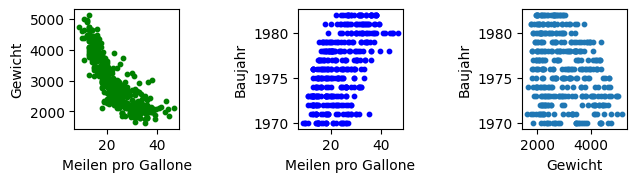

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(7,2.5))

# Visualisierung des Zusammenhangs zu mpg am Beispiel weight, KorrCoeff = -0,83
axs[0].scatter(df.mpg, df.wght, s=10, c='g')
axs[0].set_xlabel('Meilen pro Gallone')
axs[0].set_ylabel('Gewicht')

# Visualisierung des Zusammenhangs zu mpg am Beispiel year, KorrCoeff = 0,58
axs[1].scatter(df.mpg, df.year, s=10, c='b')
axs[1].set_xlabel('Meilen pro Gallone')
axs[1].set_ylabel('Baujahr')

# Visualisierung des Zusammenhangs zu mpg am Beispiel year, KorrCoeff = 0,58
axs[2].scatter(df.wght, df.year, s=10)
axs[2].set_xlabel('Gewicht')
axs[2].set_ylabel('Baujahr')

fig.tight_layout(pad=3)
plt.show()

# Ausschließliche Betrachtung der Variablen "Gewicht" und "Baujahr"
X = df[["wght", "year"]]
y_true = df["mpg"]

In [40]:
df.to_csv('data_updated_feature_eng.csv', index=False)

In [ ]:
## Iteration 3: Feature "Ursprungsland"

%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(7,2.5))

# Visualisierung des Zusammenhangs zu mpg am Beispiel weight, KorrCoeff = -0,83
axs[0].scatter(df.mpg, df.wght, s=10, c='g')
axs[0].set_xlabel('Meilen pro Gallone')
axs[0].set_ylabel('Gewicht')

# Visualisierung des Zusammenhangs zu mpg am Beispiel year, KorrCoeff = 0,58
axs[1].scatter(df.mpg, df.org, s=10, c='b')
axs[1].set_xlabel('Meilen pro Gallone')
axs[1].set_ylabel('Ursprungsland')

# Visualisierung des Zusammenhangs zu mpg am#
#  Beispiel year, KorrCoeff = 0,58
axs[2].scatter(df.wght, df.org, s=10)
axs[2].set_xlabel('Gewicht')
axs[2].set_ylabel('Ursprungsland')

fig.tight_layout(pad=3)
plt.show()

# Iteration 3: Ausschließliche Betrachtung der Variablen "Gewicht" und "Ursprungsland"
X = df[["wght", "org"]]
y_true = df["mpg"]

### Stufe Modellbildung

In [ ]:
# Trainieren eines linearen Regressionsmodells
from sklearn.linear_model import LinearRegression

# Anlegen des Objekts "Lineare Regression" und Ausführen der Regression
lm = LinearRegression()
lm.fit(X, y_true)

In [28]:
## Iteration 2: Polynomiale Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_poly = PolynomialFeatures(degree=2).fit_transform(X)

poly = LinearRegression()
poly.fit(X_poly, y_true)


LinearRegression()

### Stufe Evaluierung

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

y_pred = lm.predict(X)

# Ausgabe Bestimmtheitsmaß R^2
r_2 = lm.score(X, df.mpg)

# Visueller Vergleich der wahren mit den vorhergesagten Werten
fig, axs = plt.subplots(ncols=2, figsize=(7, 4.5))
PredictionErrorDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
PredictionErrorDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_ylabel("Actual - Predicted values", labelpad = -2)
fig.suptitle("R^2 score: " + str(r_2), y=0.9)
plt.tight_layout(pad=3)
plt.savefig("metrics.png")


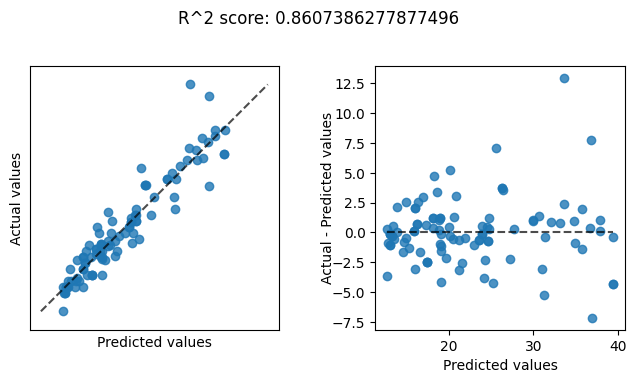

In [29]:
## Iteration 2: polynomiale Regression

from sklearn.metrics import PredictionErrorDisplay

y_pred = poly.predict(X_poly)

# Ausgabe Bestimmtheitsmaß R^2
r_2 = poly.score(X_poly, df.mpg)

# Visueller Vergleich der wahren mit den vorhergesagten Werten
fig, axs = plt.subplots(ncols=2, figsize=(7, 4.5))
PredictionErrorDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
PredictionErrorDisplay.from_predictions(
    y_true=y_true,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_ylabel("Actual - Predicted values", labelpad = -2)
fig.suptitle("R^2 score: " + str(r_2), y=0.9)
plt.tight_layout(pad=3)
plt.savefig("metrics.png")

# Ebene "Nachbearbeitung"

### Stufe "Bereitstellung"

In [ ]:
import pickle

with open("model.pkl",'wb') as f:
    pickle.dump(lm,f)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

def fuelConversion(fuel):
    g = 3.785411784   # liters per gallon
    m = 1609.344    # meters per mile
    kpg = (g / m * 1000)    # kilometers per gallon 
    return  100 / fuel * kpg    # returns fuel as mpg to l/100km or vice versa

weight_kg = 1080
year = 1971

weight_lbs = weight_kg * 2.205
year_mod_100 = year % 100

input = [
    [weight_lbs, # Gewicht in Pfund (1110 kg)
    year_mod_100]   # Baujahr Modulo 100 (Produktionsbeginn 1971)
    ]

print(input)

transformed_input = PolynomialFeatures(degree=2).fit_transform(input).tolist()

print(fuelConversion(poly.predict(transformed_input)))

[[2381.4, 71]]
[10.1103164]


In [34]:
import csv

# Öffne die CSV-Datei im Lesemodus
with open('data.csv', 'r') as file:
    # Lese den Inhalt der CSV-Datei
    csv_reader = csv.reader(file)
    
    # Extrahiere die Header-Zeile
    headers = next(csv_reader)
    
    # Index der "year"-Spalte finden
    year_index = headers.index('year')
    
    # Lese die Daten und aktualisiere die "year"-Spalte
    data = [row[:year_index] + ['19' + row[year_index]] + row[year_index+1:] for row in csv_reader]

# Öffne die CSV-Datei im Schreibmodus und schreibe die aktualisierten Daten
with open('data_updated.csv', 'w', newline='') as file:
    # Schreibe die Header-Zeile
    csv_writer = csv.writer(file)
    csv_writer.writerow(headers)
    
    # Schreibe die aktualisierten Daten
    csv_writer.writerows(data)